In [187]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Data preparation

In [191]:
df = pd.read_csv(r"C:\Users\223099055.HCAD\Downloads\DANA\dana_transactions.csv")
df = df[(df['transaction_status'] == 'completed') & (df['is_refunded'] == 'no')]

with open('personality.pickle', 'rb') as f:
    personality = pickle.load(f)

with open('user_gender.pickle', 'rb') as f:
    user_gender = pickle.load(f)

In [193]:
data = []
for u in df['user_id'].unique():
    if u not in user_gender:
        continue
    
    df_u = df[df['user_id'] == u].copy()
    row = personality[u]
    row['user'] = u
    row['gender'] = user_gender[u]
    row['avg_expense'] = df_u['transaction_amount'].mean()
    data.append(row)

In [ ]:
new_df = pd.DataFrame(data)

# User Segmentation

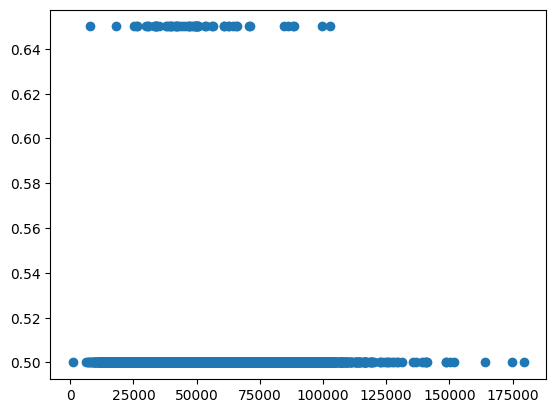

In [205]:
plt.scatter(
    x=new_df["avg_expense"],
    y=new_df["agreeableness"],
)
plt.show()

In [212]:
agree_expense_df = new_df[["agreeableness", "avg_expense"]].copy()
df_log = np.log(agree_expense_df)

std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

In [213]:
errors = []
for k in range(1, 6):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    errors.append(model.inertia_)

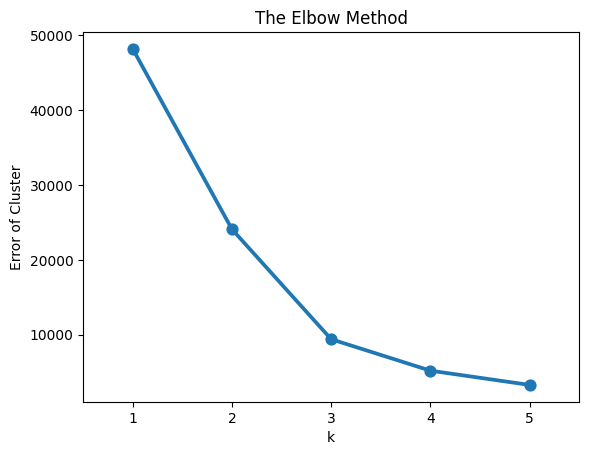

In [214]:
plt.title('The Elbow Method')
plt.xlabel('k') 
plt.ylabel('Error of Cluster')
sns.pointplot(x=list(range(1, 6)), y=errors)
plt.show()

In [215]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [216]:
new_df = new_df.assign(cluster=model.labels_)

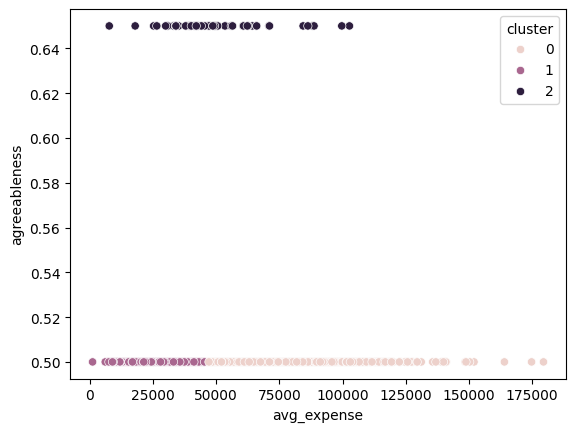

In [219]:
sns.scatterplot(
   x="avg_expense",
   y="agreeableness",
   data=new_df,
   hue='cluster',
)
plt.savefig('agree_expense_cluster.png')
# plt.show()